# Ray-Tracing Code

First, we import the necessary packages.

In [187]:
import numpy as np
import os
import subprocess
import fileinput
import matplotlib.pyplot as plt
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

Now, we do some modification to make the plots look more aesthetically pleasing.

In [188]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
rcParams.update({'figure.autolayout': True})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rcParams['axes.labelweight'] = 'bold'

We next import the C++ file.

In [244]:
!g++ -std=c++11 "orbit_1.cpp" #Just paste the file path into the quotation marks

From here, to run the simulation we need to initialize the parameters by inputting the initial conditions of the system. To do so, we first import the .txt file.

In [245]:
f = open("IP.txt","w+")

Then, we define the physical parameters of the black hole, the initial positions and velocities.

In [246]:
#Black-hole parameters
e = 0.24
semi =260
b = semi*(1-e**2)**0.5 
p = b**2/semi 
h = p**0.5
a = 0.9

#Initial Positions
# r0 = semi*(1+e)
# theta0=np.pi/2
# phi0= np.pi

#Initial Velocities
# Coe = 0.9
v = h/p*(1-e)
gamma= 1/(1-v**2)**0.5
tdot = gamma
# rdot= 0
# thetadot= 0
# phidot= gamma*h/p*(1-e)/semi/(1+e)

omg = np.pi/12
i = np.pi/4

x = np.cos(omg)*(1+e)*(-semi)
y = np.sin(omg)*np.cos(i)*(1+e)*(-semi)
z = np.sin(omg)*np.sin(i)*(1+e)*(-semi)

xdot = -np.sin(omg)*v*gamma
ydot = np.cos(omg)*np.cos(i)*v*gamma
zdot = np.cos(omg)*np.sin(i)*v*gamma

r = (x**2 + y**2 + z**2)**0.5
theta = np.arccos(z/r)
phi = np.arctan2(y,x)

print('initial conditions [r, theta, phi]', r, theta/np.pi, phi/np.pi)

rdot = xdot*np.cos(phi)*np.sin(theta) + ydot*np.sin(phi)*np.sin(theta) + zdot*np.cos(theta)
thetadot = (xdot*np.cos(phi)*np.cos(theta) + ydot*np.sin(phi)*np.cos(theta) - zdot*np.sin(theta))/r
phidot = (-xdot*np.sin(phi) + ydot*np.cos(phi))/r/np.sin(theta)


#turn it into strings so we can write the parameters in the text file
r=str(r)
theta=str(theta)
phi=str(phi)
tdot0=str(tdot)
rdot0=str(rdot)
thetadot0=str(thetadot)
phidot0=str(phidot)

#Write the parameters into the textfile
f.write(r + '\n')
f.write(theta + '\n')
f.write(phi + '\n')
f.write(tdot0 + '\n')
f.write(rdot0 + '\n')
f.write(thetadot0 + '\n')
f.write(phidot0 + '\n')
f.write(str(a) + '\n')
#Close the IP.txt file
f.close()

initial conditions [r, theta, phi] 322.4 0.558584947719442 -0.9403967604355052


Since the Kerr metric has axisymmetry, the above initial conditions are written in polar coodinates. However, numerical codes are typically discretized in Cartesian coordinates. So, we need to convert to Cartesian coordinates for the computer to interpret.

In [247]:
#run the program called a.out
proc = subprocess.Popen(["./a.out"])
proc.wait()

# Sometimes you get an error when the photons falls within the event horizon and nothing gets printed. 
#This statement just make sure the program has saved the coordinates.
if os.stat("geodesic_e7.dat").st_size<2: 
    print('error')
else:
    #Read data
    r_photon, theta_photon, phi_photon, t, vr, vtheta, vphi, vt= np.loadtxt('geodesic_e7.dat', unpack=True)
    #Convert spherical coordinates in GR to Cartesi
    ############################################################ a = 0.998
    
    x=np.sqrt(r_photon**2+a**2)*np.sin(theta_photon)*np.cos(phi_photon)
    y=np.sqrt(r_photon**2+a**2)*np.sin(theta_photon)*np.sin(phi_photon)
    xy=np.sqrt(x**2+y**2)
    z=r_photon*np.cos(theta_photon)
    hit_accretion=(np.diff(np.sign(z)) != 0)
    x=x[:-1]
    xy=xy[:-1]
    y=y[:-1]
    z=z[:-1]
    t=t[:-1]
    r_photon = r_photon[:-1] 
    theta_photon = theta_photon[:-1]
    phi_photon = phi_photon[:-1]
    vr=vr[:-1]
    vtheta=vtheta[:-1]
    vphi=vphi[:-1]


322.4
1.75485
-2.95434
1.00118
-6.07153e-18
-0.00010475
-0.000110308


Now, we plot the results, trace the geodesics, and represent the collisions with the disk by a point.

/tmp/ipykernel_22252/2213257730.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[hit_accretion],y[hit_accretion],'r.',color='red')
/tmp/ipykernel_22252/2213257730.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(y[hit_accretion],z[hit_accretion],'r.',color='red')


<Figure size 640x480 with 0 Axes>

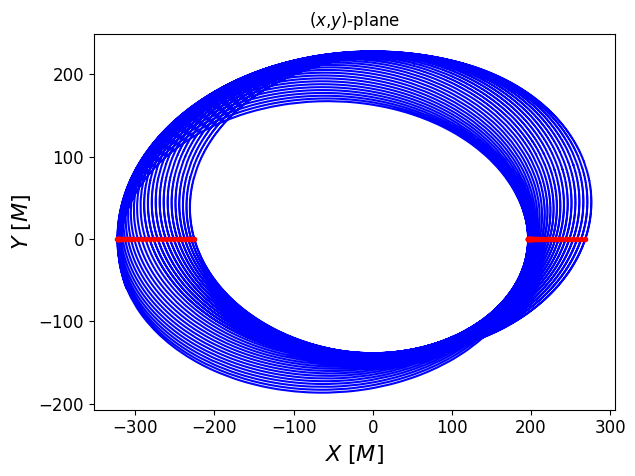

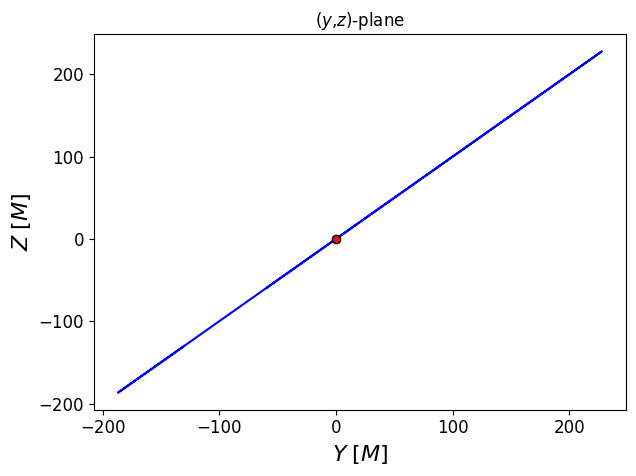

/tmp/ipykernel_22252/2213257730.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[hit_accretion],z[hit_accretion],'r.',color='red')


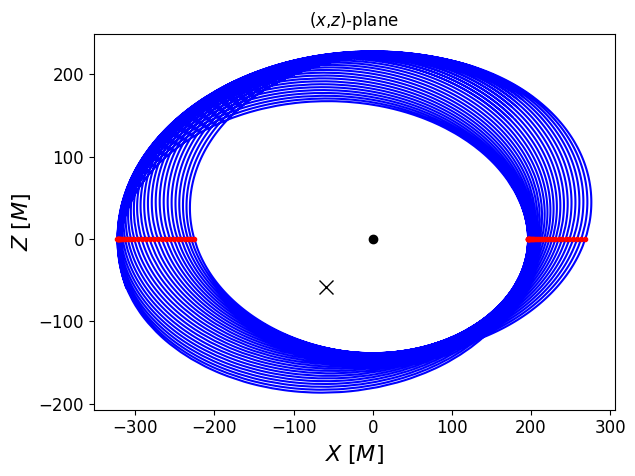

<Figure size 640x480 with 0 Axes>

In [248]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(0, 0, 0,s=50,c='black',zorder=-1)
plt.figure()
plt.plot(x,y,color = 'blue')
plt.plot(y[0],z[0])

#plt.plot(0,0,'ko')
plt.plot(x[hit_accretion],y[hit_accretion],'r.',color='red')
plt.xlabel(r'$X\;[M]$')
plt.ylabel(r'$Y\; [M]$')
plt.title(r'($x$,$y$)-plane')
plt.savefig('geodesics_xy.png')
plt.show

plt.figure()
plt.plot(y,z,color = 'blue')
#plt.plot(y[0],z[0],'ro')
plt.plot(0,0,'ko')
#plt.plot(y[0],z[0],'bo')
#plt.plot(np.sin(omg)*np.cos(i)*(1-e)*(semi),np.sin(omg)*np.sin(i)*(1-e)*(semi),'ro')
plt.plot(y[hit_accretion],z[hit_accretion],'r.',color='red')
plt.xlabel(r'$Y\;[M]$')
plt.ylabel(r'$Z\; [M]$')
plt.title(r'($y$,$z$)-plane')
plt.savefig('geodesics_yz.png')
plt.show()

plt.figure()
plt.plot(x,z,color = 'blue')
#plt.plot(y[0],z[0],'ro')
plt.plot(0,0,'ko')
plt.plot(y[0],z[0],marker='x',markersize = 10,color = 'black')
#plt.plot(np.sin(omg)*np.cos(i)*(1-e)*(semi),np.sin(omg)*np.sin(i)*(1-e)*(semi),'ro')
plt.plot(x[hit_accretion],z[hit_accretion],'r.',color='red')
plt.xlabel(r'$X\;[M]$')
plt.ylabel(r'$Z\; [M]$')
plt.title(r'($x$,$z$)-plane')
plt.savefig('geodesics_xz.png')
plt.show()

#Plot orbit

#ax.scatter3D(0, 0, 10, 'k', s=500,c='k')
#ax.scatter3D(0, 0, 0, s=100,c='k',zorder=-1)
X = np.linspace(-100,100,51)
Y = np.linspace(-100,100,51)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X,Y,Z = 0*X,alpha=0.3)
ax.plot_surface(X,Y,Z = Y*np.tan(i),alpha=0.3)

ax.plot(x, y, z, '-', zorder=-1)
ax.scatter3D(x[hit_accretion], y[hit_accretion], z[hit_accretion],s=30,c='r',zorder=-1)
ax.scatter3D(x[0], y[0], z[0],s=10,marker='x',c='black',zorder=-1)

#ax.scatter3D(np.cos(omg)*(1-e)*(semi),np.sin(omg)*np.cos(i)*(1-e)*(semi),np.sin(omg)*np.sin(i)*(1-e)*(semi),s=30,c='r',zorder=-1)
ax.scatter3D(0, 0, 0,s=50,c='black',zorder=-1)
ax.plot(np.linspace(-200,200,51),np.zeros(51),np.zeros(51))
#ax.scatter3D(x[12054],y[12054],z[12054],s=30,c='m')
#ax.scatter3D(x[18326],y[18326],z[18326],s=30,c='m')
#ax.scatter3D(x[58778],y[58778],z[58778],s=30,c='m')
#ax.scatter3D(x[77678],y[77678],z[77678],s=30,c='m')
ax.set_xlim3d(-200,200)
ax.set_ylim3d(-200,200)
ax.set_zlim3d(-200,200)
#plt.title('Beaming',fontsize=20, fontweight='bold')
ax.set_xlabel('X [$\\mathbf{R_g}$]')
ax.set_ylabel('Y [$\\mathbf{R_g}$]')
ax.set_zlabel('Z [$\\mathbf{R_g}$]')
plt.savefig("orbit.eps")
plt.show()

We can also plot the radial distance from the center of the SMBH against time. First, we convert to radial coordinates.

In [249]:
r = np.sqrt(x[hit_accretion]**2+y[hit_accretion]**2+z[hit_accretion]**2)

Now, we perform some rescaling to mimic the QPE signatures.

In [250]:
t_scaled = np.zeros(len(t[hit_accretion])*3) # multiply by 3, so we have 1 value before and after each hit
r_scaled = np.zeros(len(r)*3)
t_broad=0.1 # how broad do we want our peak to appear

t_scaled[1::3]=t[hit_accretion] #Every 3rd item is when the time we hit the accretion disk
t_scaled[::3]=t[hit_accretion]-t_broad
t_scaled[2::3]=t[hit_accretion]+t_broad

r_scaled[1::3]=r # Flux is 1 if hit accretion disk else 0
r_scaled[::3]=0
r_scaled[2::3]=0

def zero_to_nan(r_scaled):
    return [float('nan') if x==0 else x for x in r_scaled]

To visualize the results, let us plot the radial distance from the center of the SMBH against time.

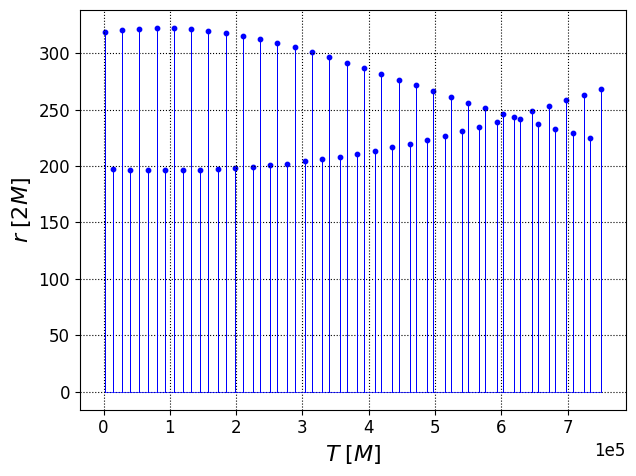

In [251]:
plt.figure()
plt.scatter(t_scaled,zero_to_nan(r_scaled), color = 'blue', s=10)
plt.plot(t_scaled,r_scaled,color = 'blue',linewidth = 0.5)
plt.grid(color = 'black',linestyle=':')
plt.xlabel(r'$T\;[M]$') # assume a mass for example 5*10^6 solar masses and the physical time will have tg=5s 
plt.ylabel(r'$r\;[2M]$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('geodesic_ray_tracing_radius_vs_time.png')
plt.savefig('geodesic_ray_tracing_radius_vs_time.pdf')

The Chandrasekhar dynamical friction model gives the expression for the energy dissipated for a compact object passing through a collisionless medium
\begin{equation}
    \delta E_{\mathrm{QPE}}=-4\pi \ln|\Lambda|\cdot\frac{G\mu^2}{v^2}\cdot\frac{\Sigma}{\sin\iota},
\end{equation}
where 
\begin{equation}
    \Sigma=5.2\alpha^{-\frac{4}{5}}\dot{M}_{16}^{\frac{7}{10}}M^{\frac{1}{4}}R_{10}^{-\frac{3}{4}}f^{\frac{14}{5}}
\end{equation}
is the surface mass density given by the Shakura-Sunyaev model. We first need to work out the collision velocity.

In [252]:
v = np.sqrt(vr[hit_accretion]**2+(r_photon[hit_accretion]*vtheta[hit_accretion])**2+(r_photon[hit_accretion]*np.sin(theta_photon[hit_accretion])*vphi[hit_accretion])**2)

In [253]:
i = np.arccos(vr[hit_accretion]*np.cos(theta_photon[hit_accretion])-vtheta[hit_accretion]*np.sin(theta_photon[hit_accretion])/v)

In [254]:
c=299792458
Msun = 1.989e+30
E = (6612.54*Msun**2*(1-0.418559*(r*524974)**(-1/2))**(7/10))/(np.sin(i)*(r*524974)**(3/4)*(v*c)**2)


Similar to the previous plot, we perform some rescaling.

In [255]:
E_scaled = np.zeros(len(E)*3) 
E_scaled[1::3]=E 
E_scaled[::3]=0
E_scaled[2::3]=0

Finally plotting the energy against time in solar masses yields.

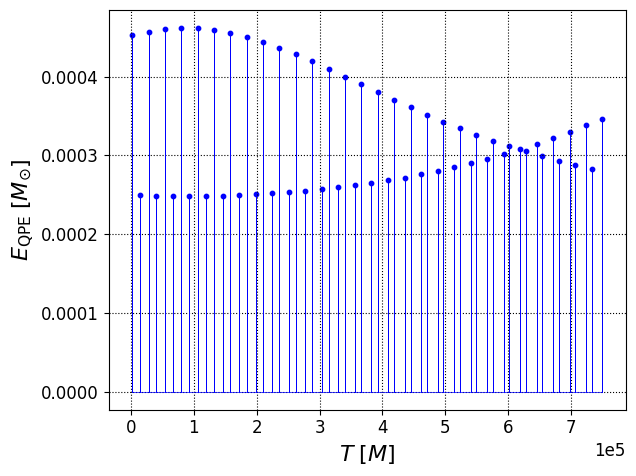

In [256]:
plt.figure()
plt.scatter(t_scaled,zero_to_nan(E_scaled/(Msun*c**2)), color = 'blue', s=10)
plt.plot(t_scaled,E_scaled/(Msun*c**2),color = 'blue',linewidth = 0.5)
plt.grid(color = 'black',linestyle=':')
plt.xlabel(r'$T\;[M]$') # assume a mass for example 5*10^6 solar masses and the physical time will have tg=5s 
plt.ylabel(r'$E_{\mathrm{QPE}}\;[M_{\odot}]$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('geodesic_ray_tracing_energy_vs_time.png')
plt.savefig('geodesic_ray_tracing_energy_vs_time.pdf')